In [16]:
import pandas as pd
a

In [17]:
df=pd.read_csv('merged_data_1951_2021.csv')
df

,time,lon,lat,temp
0,1951-01-01,83,25.5,22.980000
1,1951-01-02,83,25.5,21.580000
2,1951-01-03,83,25.5,21.510000
3,1951-01-04,83,25.5,21.410000
4,1951-01-05,83,25.5,22.889999
...,...,...,...,...
25928,2021-12-27,83,25.5,24.007275
25929,2021-12-28,83,25.5,21.532618
25930,2021-12-29,83,25.5,18.243288
25931,2021-12-30,83,25.5,18.774710


In [18]:
df.isnull()

,time,lon,lat,temp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
25928,False,False,False,False
25929,False,False,False,False
25930,False,False,False,False
25931,False,False,False,False


In [19]:
df.isnull().sum()


time    0
lon     0
lat     0
temp    2
dtype: int64

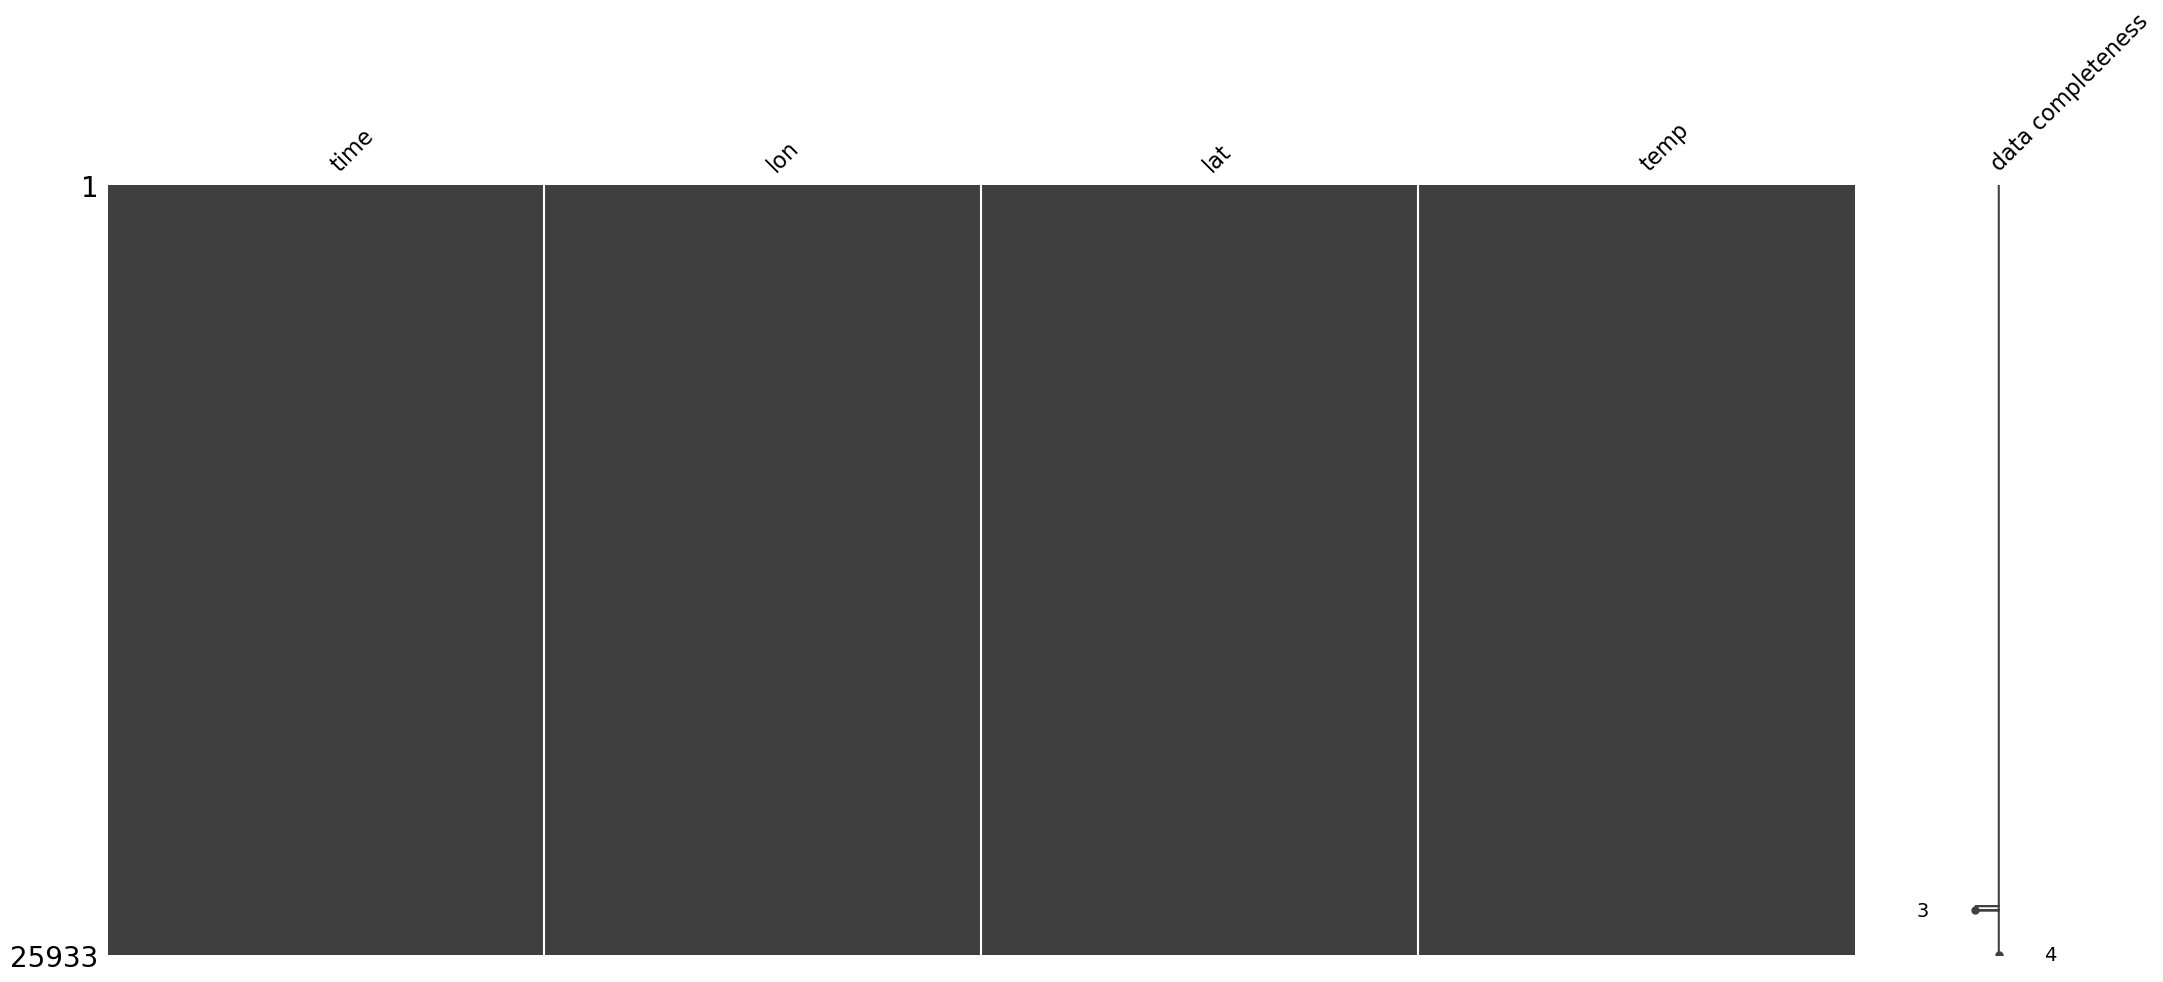

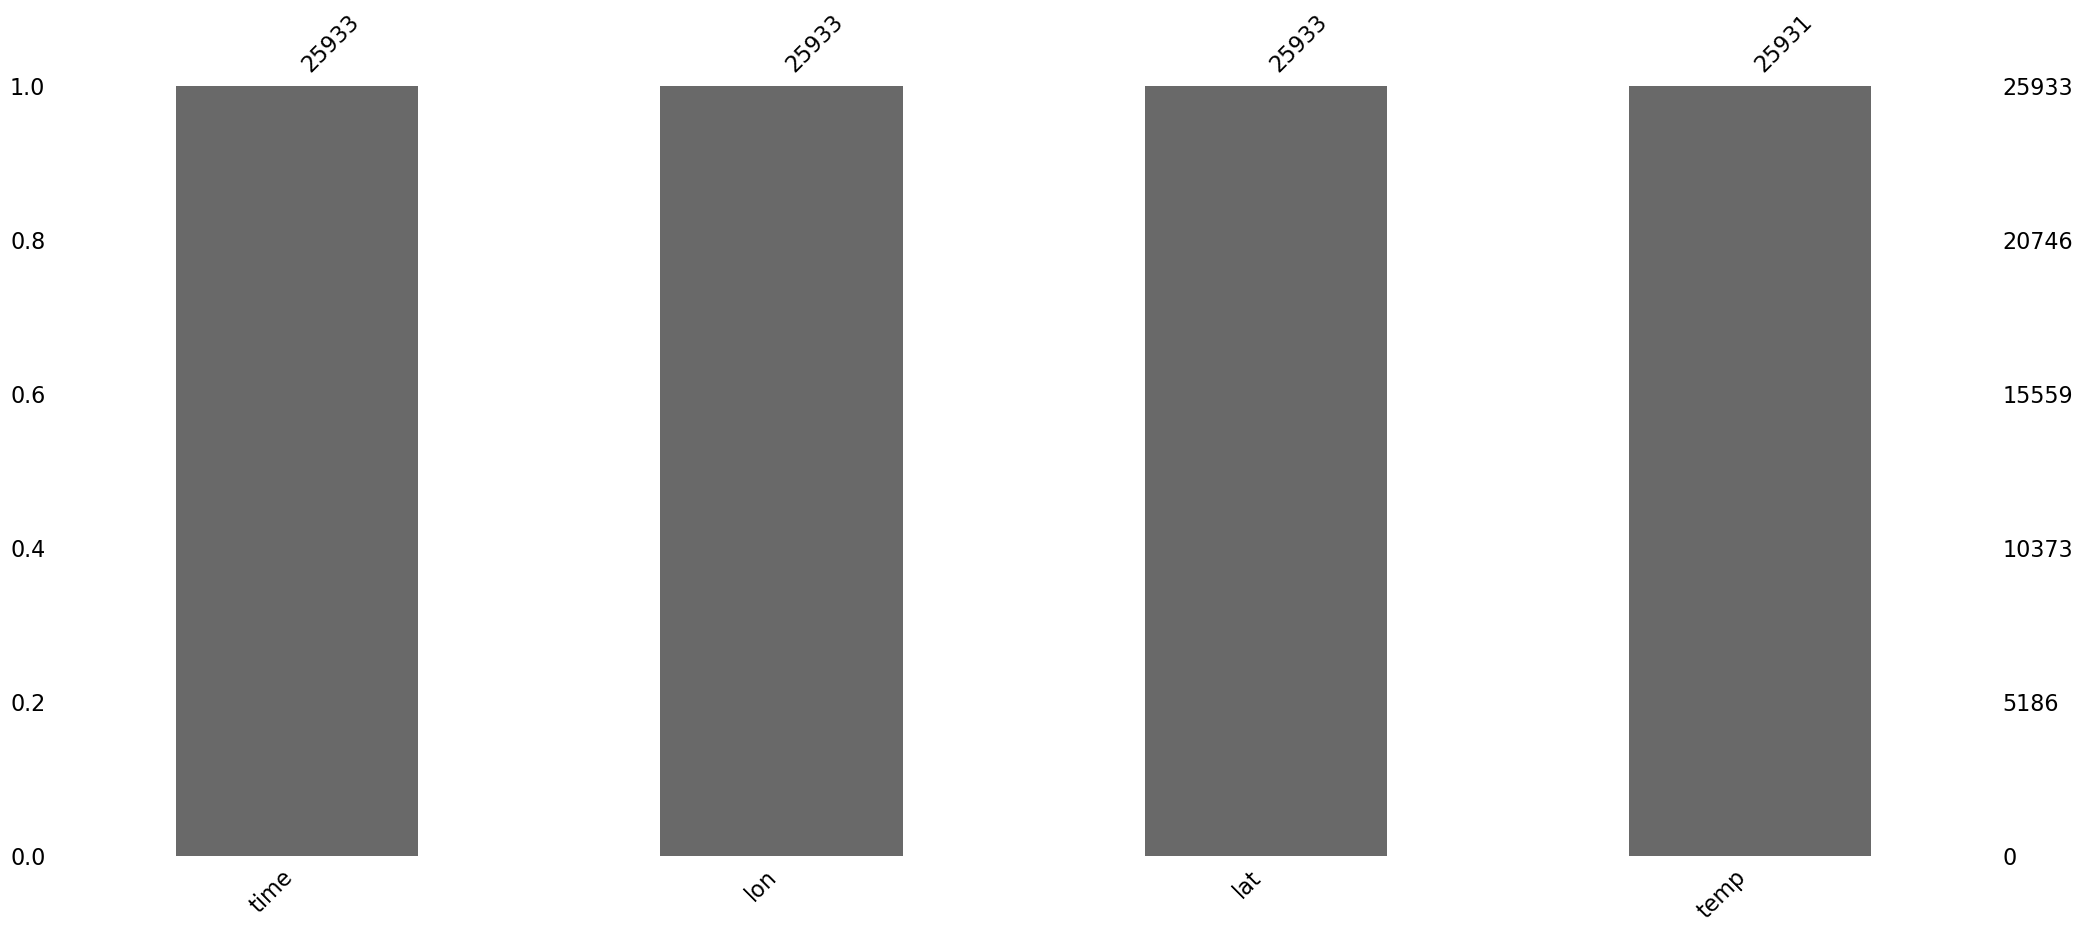

C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

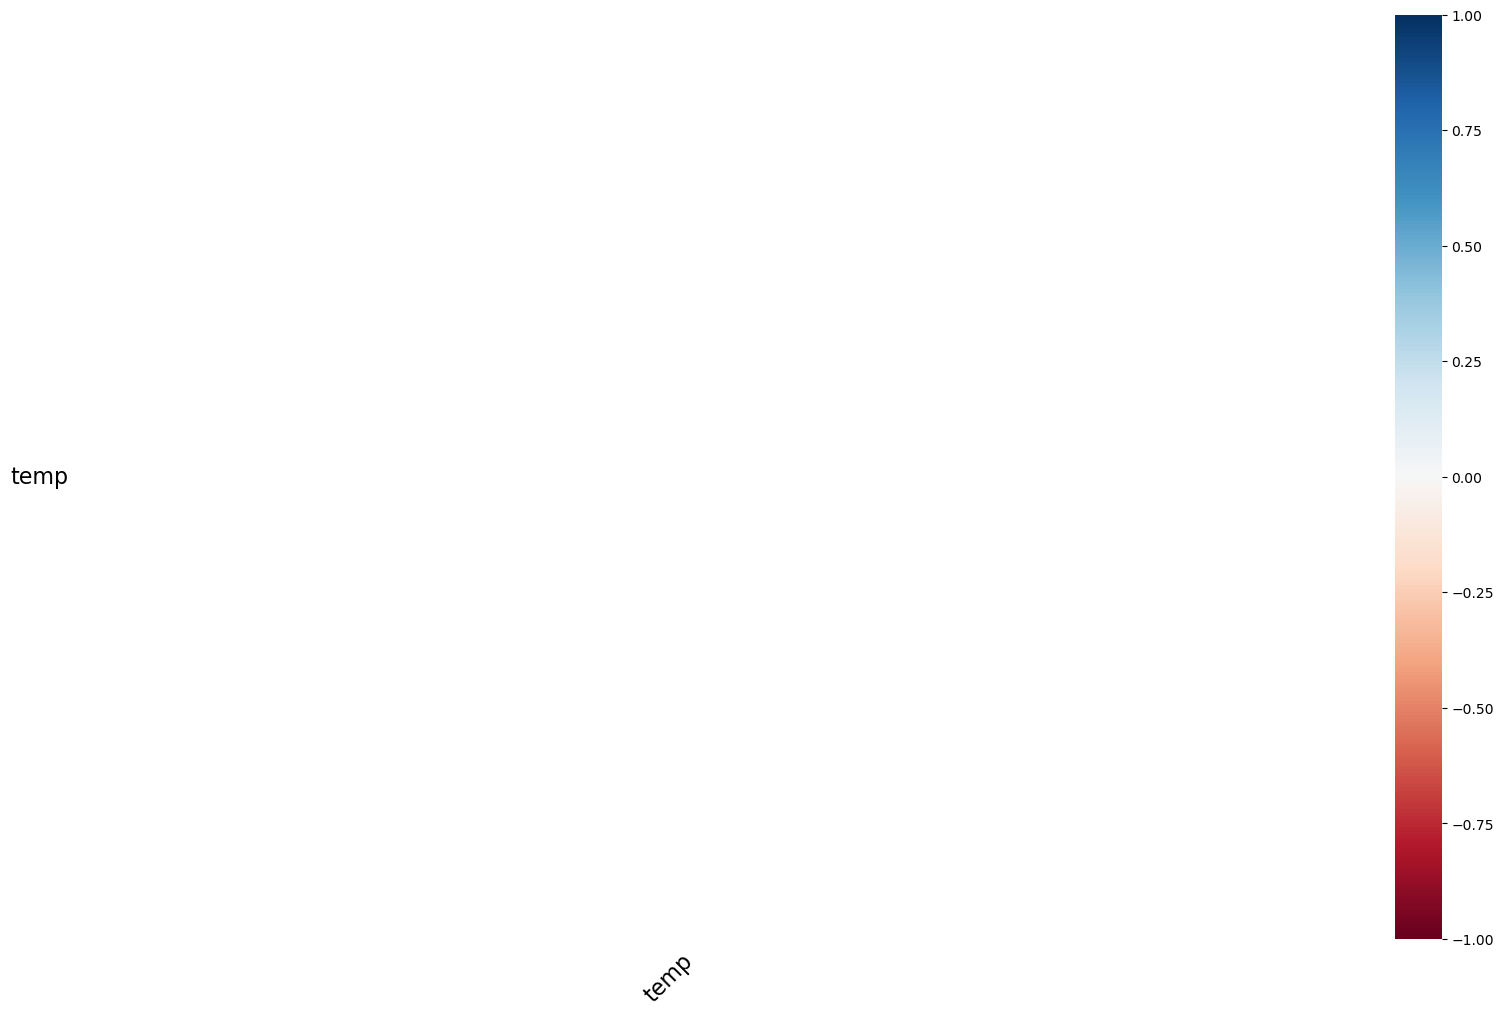

In [24]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a missing data matrix
msno.matrix(df, labels=True)
plt.show()

# Create a missing data bar plot
msno.bar(df)
plt.show()

# Create a missing data heatmap
msno.heatmap(df)
plt.show()

# Optional: Create a dendrogram to see the clustering of missing data
msno.dendrogram(df)
plt.show()

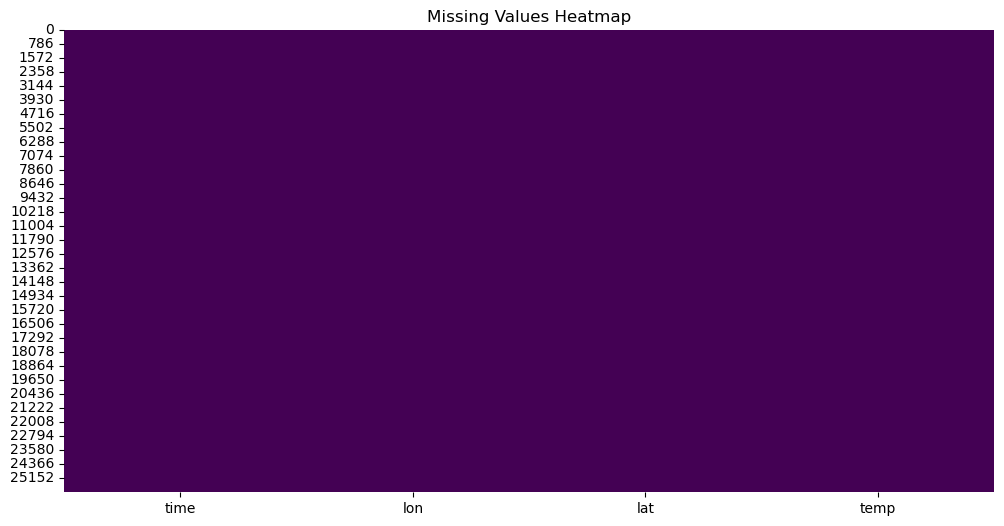

In [22]:
# Plot missing values heatmap
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [21]:
# Handling missing values by removing rows with missing temperature values
data_cleaned = df.dropna(subset=['temp'])


In [7]:
# Convert the 'time' column to datetime format
data_cleaned['time'] = pd.to_datetime(data_cleaned['time'])


C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_3864\844930696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['time'] = pd.to_datetime(data_cleaned['time'])


In [8]:
# Extract year, month, and day from the 'time' column
data_cleaned['year'] = data_cleaned['time'].dt.year
data_cleaned['month'] = data_cleaned['time'].dt.month
data_cleaned['day'] = data_cleaned['time'].dt.day

# Create a column for the season
data_cleaned['season'] = data_cleaned['time'].dt.month % 12 // 3 + 1
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
data_cleaned['season'] = data_cleaned['season'].map(season_dict)


C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_3864\4139675135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned['time'].dt.year
C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_3864\4139675135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['month'] = data_cleaned['time'].dt.month
C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_3864\4139675135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


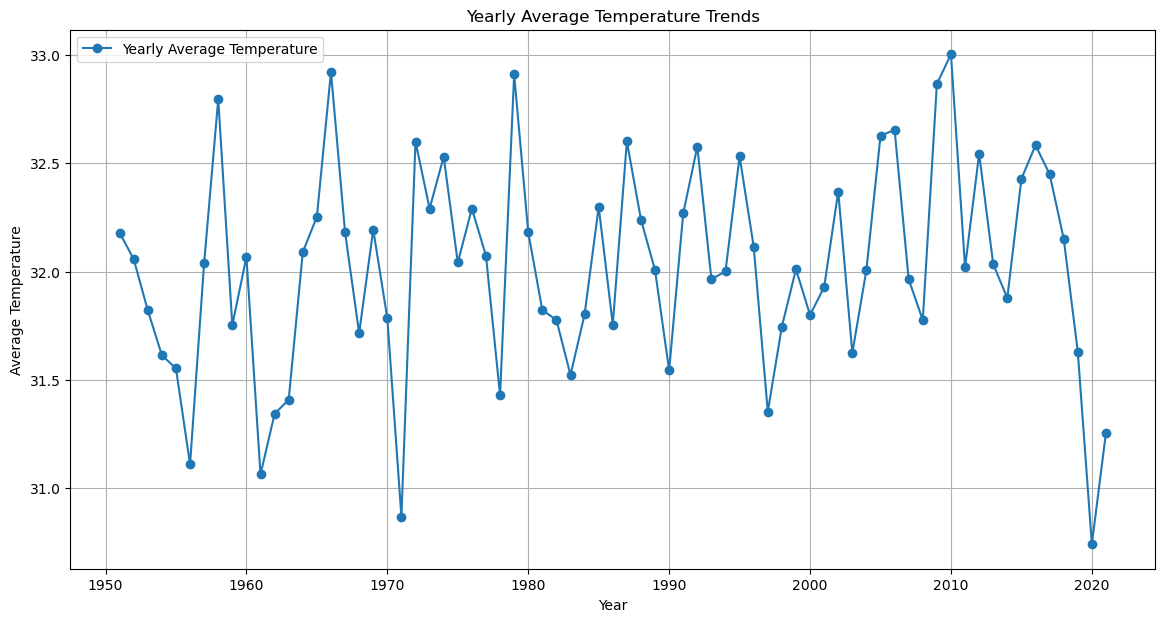

In [9]:
import matplotlib.pyplot as plt
# Calculate yearly average temperatures
yearly_avg_temp = data_cleaned.groupby('year')['temp'].mean()

# Plotting the yearly average temperature trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()


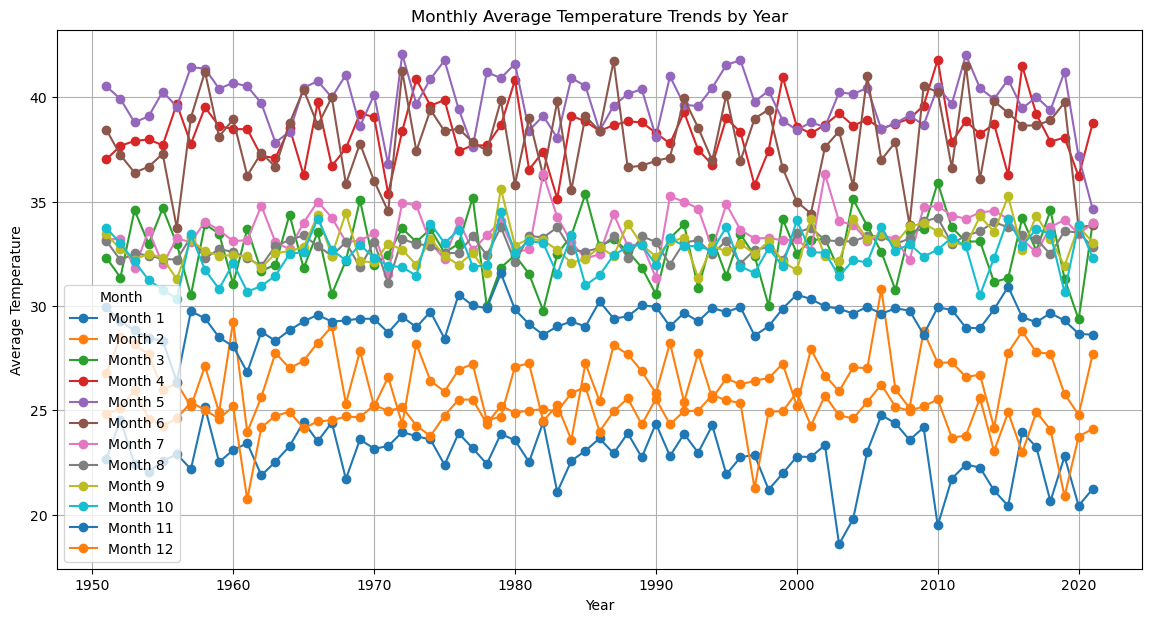

In [10]:
# Calculate monthly average temperatures
monthly_avg_temp = data_cleaned.groupby(data_cleaned['time'].dt.to_period('M'))['temp'].mean().to_frame()

# Extracting month and year from the index
monthly_avg_temp['year'] = monthly_avg_temp.index.year
monthly_avg_temp['month'] = monthly_avg_temp.index.month

# Plotting the monthly average temperature trends
plt.figure(figsize=(14, 7))
for month in range(1, 13):
    monthly_data = monthly_avg_temp[monthly_avg_temp['month'] == month]
    plt.plot(monthly_data['year'], monthly_data['temp'], marker='o', linestyle='-', label=f'Month {month}')

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Monthly Average Temperature Trends by Year')
plt.legend(title='Month')
plt.grid(True)
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing temperature values
scaler = MinMaxScaler()
data_cleaned['temp_normalized'] = scaler.fit_transform(data_cleaned[['temp']])

# Verify changes
print(data_cleaned.head())


        time  lon   lat       temp  year  month  day  season  temp_normalized
0 1951-01-01   83  25.5  22.980000  1951      1    1  Winter         0.300100
1 1951-01-02   83  25.5  21.580000  1951      1    2  Winter         0.257252
2 1951-01-03   83  25.5  21.510000  1951      1    3  Winter         0.255110
3 1951-01-04   83  25.5  21.410000  1951      1    4  Winter         0.252049
4 1951-01-05   83  25.5  22.889999  1951      1    5  Winter         0.297345


C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_3864\1435359158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['temp_normalized'] = scaler.fit_transform(data_cleaned[['temp']])


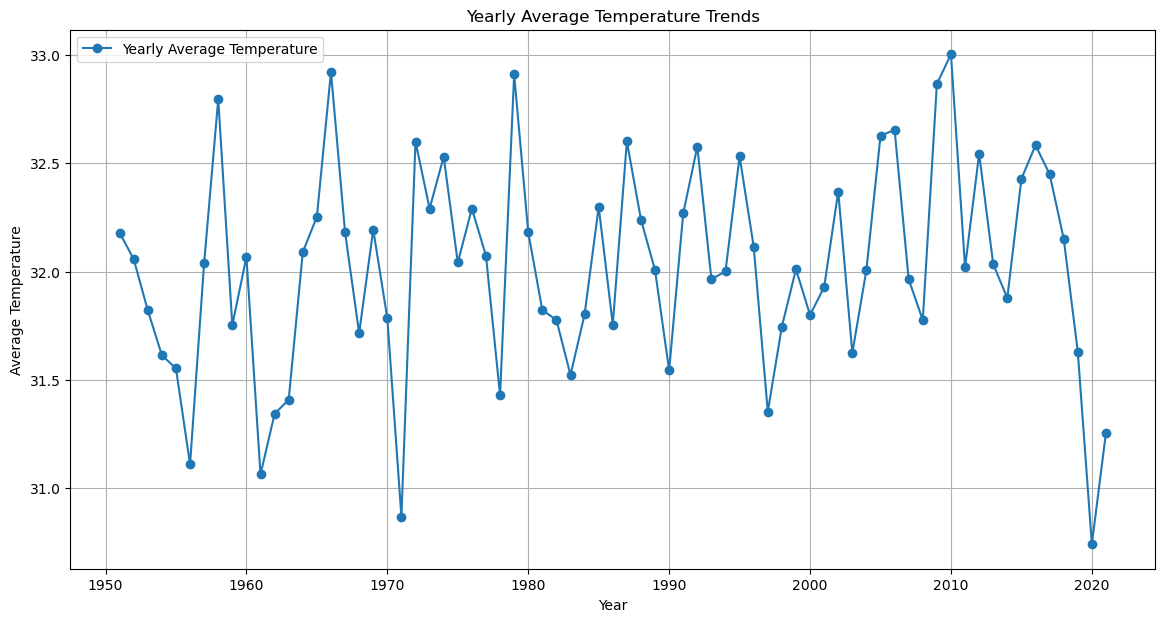

In [12]:
import matplotlib.pyplot as plt
# Calculate yearly average temperatures
yearly_avg_temp = data_cleaned.groupby('year')['temp'].mean()

# Plotting the yearly average temperature trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp, marker='o', linestyle='-', label='Yearly Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Average Temperature Trends')
plt.legend()
plt.grid(True)
plt.show()

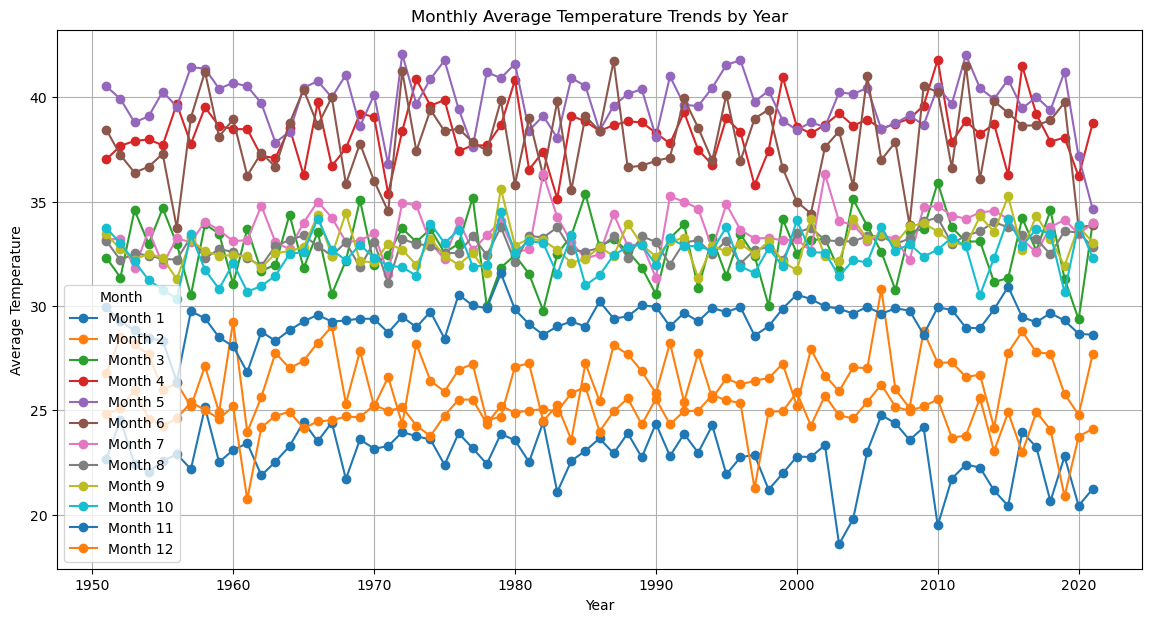

In [13]:
# Calculate monthly average temperatures
monthly_avg_temp = data_cleaned.groupby(data_cleaned['time'].dt.to_period('M'))['temp'].mean().to_frame()

# Extracting month and year from the index
monthly_avg_temp['year'] = monthly_avg_temp.index.year
monthly_avg_temp['month'] = monthly_avg_temp.index.month

# Plotting the monthly average temperature trends
plt.figure(figsize=(14, 7))
for month in range(1, 13):
    monthly_data = monthly_avg_temp[monthly_avg_temp['month'] == month]
    plt.plot(monthly_data['year'], monthly_data['temp'], marker='o', linestyle='-', label=f'Month {month}')

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Monthly Average Temperature Trends by Year')
plt.legend(title='Month')
plt.grid(True)
plt.show()
